<a href="https://colab.research.google.com/github/umanari145/python_ai/blob/main/kikagaku01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
x = np.array([1,2,3])
x

array([1, 2, 3])

In [2]:
y = np.array([2,3.9,6.1])
y

array([2. , 3.9, 6.1])

# データの中心化

In [14]:
# 平均の算出
x.mean()


2.0

In [15]:
#中心化

xc = x-x.mean()
xc

array([-1.,  0.,  1.])

In [16]:
yc = y-y.mean()
yc

array([-2. , -0.1,  2.1])

## パラメータaの計算

In [17]:
# 要素ごとの掛け算 要素
xx=xc*xc
xx

array([1., 0., 1.])

In [20]:
xy = xc*yc
xy

array([ 2. , -0. ,  2.1])

In [23]:
xy.sum()

a = xy.sum()/xx.sum()
a

2.05

# 新しいセクション

In [31]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/kikagaku_sample.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         x         y
0   40.362  137500.0
1   40.686  132500.0
2   38.430   93000.0
3   36.822   96500.0
4   37.002  100500.0
..     ...       ...
95  47.250  250000.0
96  43.722  166500.0
97  42.642  151500.0
98  43.644  173000.0
99  41.850  174500.0

[100 rows x 2 columns]


In [33]:
# 上3行のみ
df.head(3)


,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [35]:
# データの抽出
x = df['x']
y = df['y']

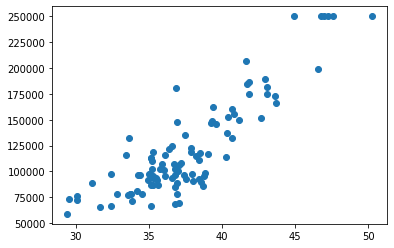

In [36]:
import matplotlib.pyplot as plt
# 横軸をx, 縦軸yの散布図
plt.scatter(x,y)

In [37]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [38]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [46]:
df_c = df - df.mean()
df_c.head(3)

df_c.describe()
x= df_c['x']
y= df_c['y']

In [44]:
## パラメータaの計算
xx = x*x
xy = x*y
a = xy.sum()/xx.sum()
a

10069.022519284063

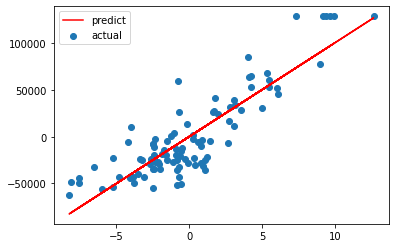

In [51]:
# 予測値のplot
# 判例をつける
plt.scatter(x,y, label='actual')
# 予測値
plt.plot(x, a*x, label='predict', color='red')
# 判例表示
plt.legend()

## 予測値の計算


In [55]:
x_new = 40 #40平米の部屋
mean = df.mean()
mean['x']

xc = x_new - mean['x']
xc

2.3777800000000013

In [57]:
yc =a*xc
print(yc)

23941.920365903272


In [59]:
# 実測値の計算
y_hat = yc+mean['y']
y_hat

145006.92036590326

In [63]:
# 予測値の計算
def predict(x):
     #定数項
     a = 10069
     xm = 37.62
     ym = 121000
     return a*(x - xm) + ym

# 内挿なので正常な値が出る
print(predict(35))

# 外挿の範囲なのでおかしい値が出てくる
print(predict(25))


print(predict(50))

94619.22000000003
-6070.77999999997
245654.22000000003
